<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,0.229894,175.888703,175.607081,0.281622
1,0.0,1.0,86.165717,56.959442,56.713429,0.127112,209.965701,209.884624,0.081077
2,0.0,2.0,82.871910,67.183861,68.394119,0.565518,229.015408,228.473546,0.541862
3,0.0,3.0,60.173628,73.828076,88.180822,0.132543,232.315068,232.140218,0.174850
4,0.0,4.0,35.709130,85.695082,80.454669,-0.691625,211.167256,211.829320,-0.662064
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,0.263975,262.947163,262.716551,0.230612
59996,999.0,56.0,36.953943,85.309647,24.003992,-0.142207,156.125375,156.307062,-0.181688
59997,999.0,57.0,64.419649,76.774011,25.100978,0.095696,176.390333,176.276998,0.113335
59998,999.0,58.0,90.553946,37.505438,62.282147,0.039648,200.381178,200.395890,-0.014712


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.042187  40.567865  74.048756  0.229894  175.888703   
      1.0    86.165717  56.959442  56.713429  0.127112  209.965701   
      2.0    82.871910  67.183861  68.394119  0.565518  229.015408   
      3.0    60.173628  73.828076  88.180822  0.132543  232.315068   
      4.0    35.709130  85.695082  80.454669 -0.691625  211.167256   
...                ...        ...        ...       ...         ...   
999.0 55.0   81.638297  88.645565  82.399326  0.263975  262.947163   
      56.0   36.953943  85.309647  24.003992 -0.142207  156.125375   
      57.0   64.419649  76.774011  25.100978  0.095696  176.390333   
      58.0   90.553946  37.505438  62.282147  0.039648  200.381178   
      59.0   20.879664  91.183392  42.595062  0.138947  164.797065   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.607081  0.281622  
      1.0    209.884624  0.081077  
      2.0    228.473546  0.541862  
      3.0    232.140218  0.174850  
      4.0    211.829320 -0.662064  
...                 ...       ...  
999.0 55.0   262.716551  0.230612  
      56.0   156.307062 -0.181688  
      57.0   176.276998  0.113335  
      58.0   200.395890 -0.014712  
      59.0   164.768891  0.028174  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.042187  40.567865  74.048756  0.229894  175.888703   
      1.0    86.165717  56.959442  56.713429  0.127112  209.965701   
      2.0    82.871910  67.183861  68.394119  0.565518  229.015408   
      3.0    60.173628  73.828076  88.180822  0.132543  232.315068   
      4.0    35.709130  85.695082  80.454669 -0.691625  211.167256   
...                ...        ...        ...       ...         ...   
999.0 55.0   81.638297  88.645565  82.399326  0.263975  262.947163   
      56.0   36.953943  85.309647  24.003992 -0.142207  156.125375   
      57.0   64.419649  76.774011  25.100978  0.095696  176.390333   
      58.0   90.553946  37.505438  62.282147  0.039648  200.381178   
      59.0   20.879664  91.183392  42.595062  0.138947  164.797065   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.607081  0.281622  
      1.0    209.884624  0.081077  
      2.0    228.473546  0.541862  
      3.0    232.140218  0.174850  
      4.0    211.829320 -0.662064  
...                 ...       ...  
999.0 55.0   262.716551  0.230612  
      56.0   156.307062 -0.181688  
      57.0   176.276998  0.113335  
      58.0   200.395890 -0.014712  
      59.0   164.768891  0.028174  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,0.229894,175.888703,175.607081,0.281622
1,0.0,1.0,86.165717,56.959442,56.713429,0.127112,209.965701,209.884624,0.081077
2,0.0,2.0,82.871910,67.183861,68.394119,0.565518,229.015408,228.473546,0.541862
3,0.0,3.0,60.173628,73.828076,88.180822,0.132543,232.315068,232.140218,0.174850
4,0.0,4.0,35.709130,85.695082,80.454669,-0.691625,211.167256,211.829320,-0.662064
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,0.263975,262.947163,262.716551,0.230612
59996,999.0,56.0,36.953943,85.309647,24.003992,-0.142207,156.125375,156.307062,-0.181688
59997,999.0,57.0,64.419649,76.774011,25.100978,0.095696,176.390333,176.276998,0.113335
59998,999.0,58.0,90.553946,37.505438,62.282147,0.039648,200.381178,200.395890,-0.014712


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.042187  40.567865  74.048756  0.229894  175.888703   
      1.0    86.165717  56.959442  56.713429  0.127112  209.965701   
      2.0    82.871910  67.183861  68.394119  0.565518  229.015408   
      3.0    60.173628  73.828076  88.180822  0.132543  232.315068   
      4.0    35.709130  85.695082  80.454669 -0.691625  211.167256   
...                ...        ...        ...       ...         ...   
999.0 55.0   81.638297  88.645565  82.399326  0.263975  262.947163   
      56.0   36.953943  85.309647  24.003992 -0.142207  156.125375   
      57.0   64.419649  76.774011  25.100978  0.095696  176.390333   
      58.0   90.553946  37.505438  62.282147  0.039648  200.381178   
      59.0   20.879664  91.183392  42.595062  0.138947  164.797065   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.607081  0.281622  
      1.0    209.884624  0.081077  
      2.0    228.473546  0.541862  
      3.0    232.140218  0.174850  
      4.0    211.829320 -0.662064  
...                 ...       ...  
999.0 55.0   262.716551  0.230612  
      56.0   156.307062 -0.181688  
      57.0   176.276998  0.113335  
      58.0   200.395890 -0.014712  
      59.0   164.768891  0.028174  

[60000 rows x 7 columns]

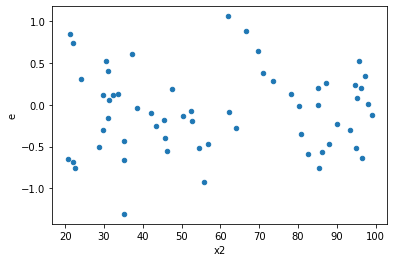

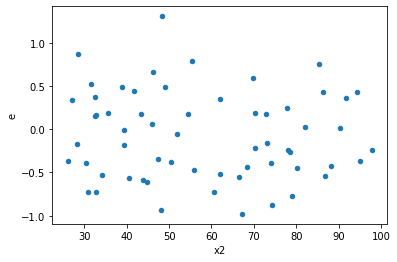

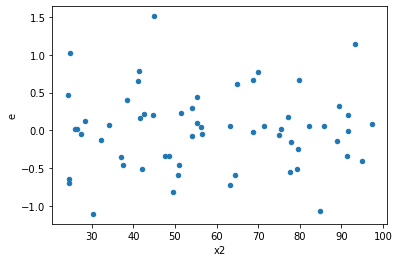

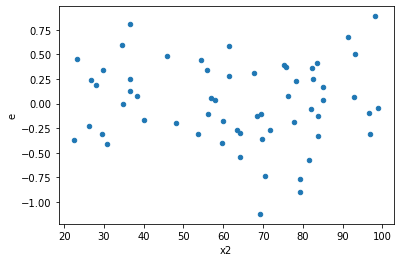

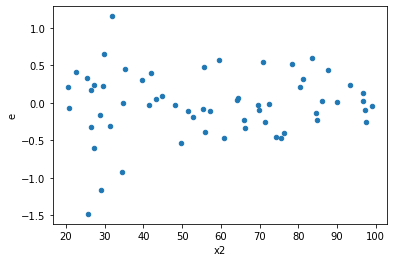

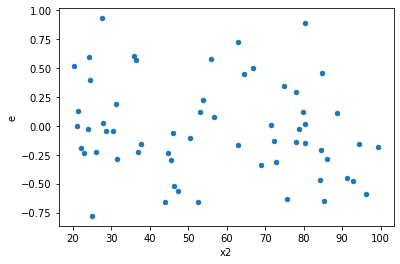

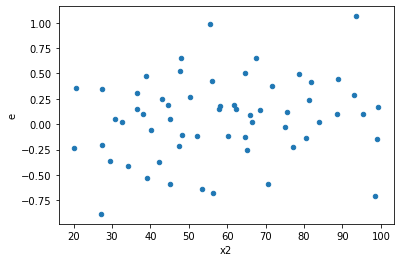

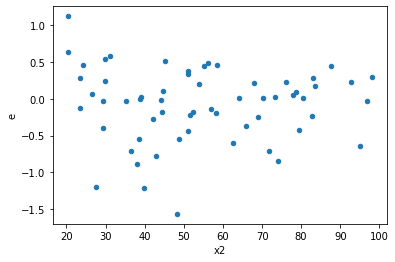

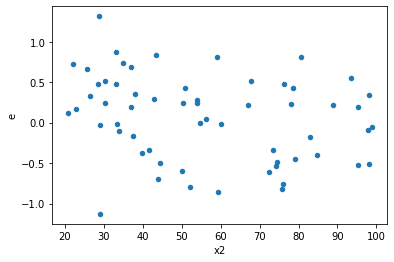

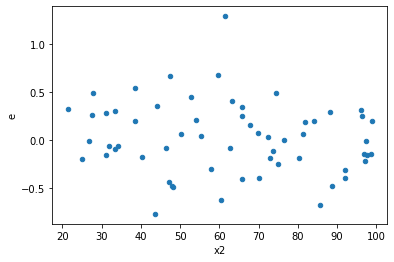

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,29.0,25.0,5.463178899159498,6.500707034488438,0.188385479281362,0.26002828137953754,1.3802989613184244,0.41634817547006064,0.7918259122649697,0.20817408773503032,Reject005=1 : Homoscedasticity
1.0,24.0,30.0,3.4629234345040394,7.813053957284502,0.14428847643766832,0.2604351319094834,1.8049614102203768,0.1258387324860173,0.9370806337569914,0.06291936624300865,Reject005=1 : Homoscedasticity
6.0,24.0,30.0,3.8729536604957895,5.938946031833795,0.16137306918732455,0.19796486772779315,1.2267528201870674,0.5900641736264984,0.7049679131867508,0.2950320868132492,Reject005=1 : Homoscedasticity
7.0,28.0,26.0,5.056363613318828,5.4674868246883035,0.1805844147613867,0.21028795479570397,1.1644856233776637,0.6992123054012573,0.6503938472993713,0.34960615270062867,Reject005=1 : Homoscedasticity
10.0,25.0,29.0,5.354315046977258,6.253878681739121,0.21417260187909032,0.21565098902548693,1.0069027837054116,0.9782678073023525,0.5108660963488237,0.48913390365117626,Reject005=1 : Homoscedasticity
11.0,34.0,20.0,8.107651578110765,5.278522640819345,0.23846034053266957,0.26392613204096727,1.106792565385978,0.8286693619259973,0.5856653190370014,0.41433468096299864,Reject005=1 : Homoscedasticity
12.0,20.0,34.0,4.947839483272799,8.925110605486463,0.24739197416363995,0.262503253102543,1.0610823329656909,0.8553036407351366,0.5723481796324317,0.4276518203675683,Reject005=1 : Homoscedasticity
13.0,33.0,21.0,4.296204199949439,5.208625935689962,0.1301880060590739,0.24802980646142675,1.9051663357443323,0.12389314424784592,0.938053427876077,0.06194657212392296,Reject005=1 : Homoscedasticity
14.0,29.0,25.0,2.773196998514454,7.8834698904515,0.09562748270739496,0.31533879561806,3.2975749929855107,0.0033856254511479555,0.998307187274426,0.0016928127255739778,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,25.0,5.463178899159498,6.500707034488438,0.188385479281362,0.26002828137953754,1.3802989613184244,0.41634817547006064,Reject005=1 : Homoscedasticity
1.0,24.0,30.0,3.4629234345040394,7.813053957284502,0.14428847643766832,0.2604351319094834,1.8049614102203768,0.1258387324860173,Reject005=1 : Homoscedasticity
2.0,20.0,34.0,5.157835423074237,5.837788436561008,0.25789177115371187,0.1716996598988532,0.6657818476748318,0.3390543312621815,Reject005=1 : Homoscedasticity
3.0,29.0,25.0,6.239413537731191,4.76302101053754,0.21515219095624796,0.1905208404215016,0.885516617677599,0.7474072999638433,Reject005=1 : Homoscedasticity
4.0,26.0,28.0,4.822309590969992,2.687897852629475,0.18547344580653816,0.0959963518796241,0.5175746396589571,0.09531921730454185,Reject005=1 : Homoscedasticity
5.0,27.0,27.0,5.57340176205638,3.929748388760432,0.20642228748356964,0.14554623662075675,0.7050897381046687,0.3695962540542372,Reject005=1 : Homoscedasticity
6.0,24.0,30.0,3.8729536604957895,5.938946031833795,0.16137306918732455,0.19796486772779315,1.2267528201870674,0.5900641736264984,Reject005=1 : Homoscedasticity
7.0,28.0,26.0,5.056363613318828,5.4674868246883035,0.1805844147613867,0.21028795479570397,1.1644856233776637,0.6992123054012573,Reject005=1 : Homoscedasticity
8.0,26.0,28.0,5.415310830905516,4.546694411262301,0.2082811858040583,0.1623819432593679,0.7796284749988394,0.5262195198395386,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      899
Reject005=0 : Heteroscedasticity    101
Name: Result_test, dtype: int64